# Analisando os dados das notas(ratings.csv) do Movie Lens

In [11]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

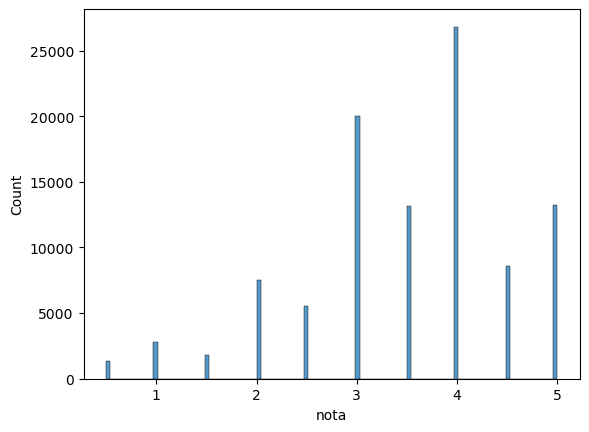

In [13]:
import seaborn as sns
sns.histplot(notas.nota)

# Analisando os dados dos filmes(movies.csv) do Movie Lens

In [14]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeID","titulo","generos"]
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
filmes.filmeID

0            1
1            2
2            3
3            4
4            5
         ...  
9737    193581
9738    193583
9739    193585
9740    193587
9741    193609
Name: filmeID, Length: 9742, dtype: int64

In [16]:
notas.query("filmeID==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [17]:
notas.query("filmeID==1").nota.value_counts()

nota
4.0    82
5.0    47
3.0    34
4.5    18
3.5    18
2.5     8
2.0     6
0.5     1
1.5     1
Name: count, dtype: int64

In [18]:
notas.query("filmeID==2").nota.value_counts()

nota
4.0    36
3.0    28
2.5    12
3.5    11
4.5     7
5.0     7
2.0     5
1.5     2
1.0     1
0.5     1
Name: count, dtype: int64

In [19]:
notas.groupby("filmeID").mean()

,usuarioID,nota,momento
filmeID,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [20]:
media_notas_filmes = notas.groupby("filmeID").mean()["nota"]
media_notas_filmes

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

# Leitura de Data Frames do The Movie Data Base 

In [21]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.title.head(10)

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
5                                Spider-Man 3
6                                     Tangled
7                     Avengers: Age of Ultron
8      Harry Potter and the Half-Blood Prince
9          Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [22]:
tmdb.original_language.value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [23]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: >

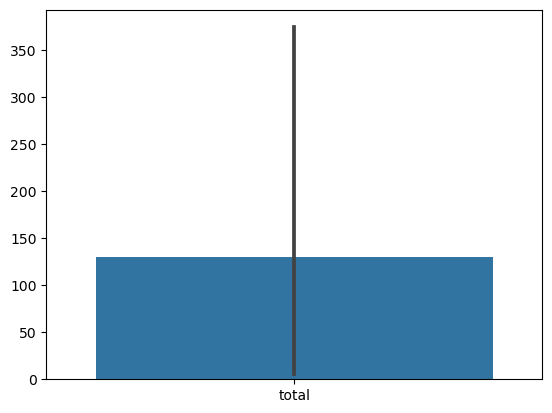

In [24]:
import seaborn as sns
sns.barplot(data = contagem_de_lingua)

<Axes: xlabel='original_language', ylabel='total'>

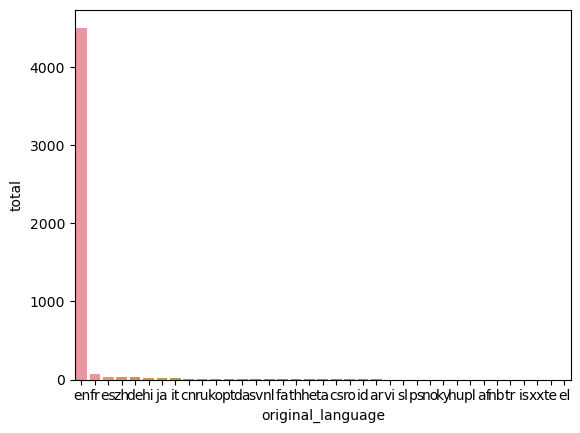

In [25]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

In [26]:
print(sns.__version__)

0.12.2


c:\Users\mstan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


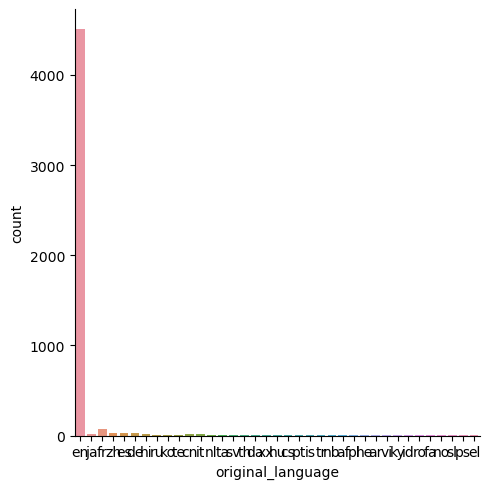

In [27]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x1b5e092cad0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

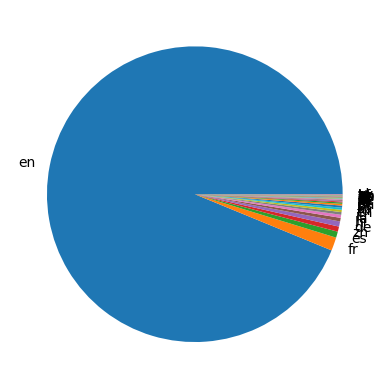

In [28]:
import matplotlib.pyplot as plt
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [29]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [30]:
dados = {
    'Lingua' : ["Inglês", "Outros"],
    'Total' : [total_de_ingles, total_do_resto]
}

In [31]:
dados = pd.DataFrame(dados)
dados

,Lingua,Total
0,Inglês,4505
1,Outros,298


<Axes: xlabel='Lingua', ylabel='Total'>

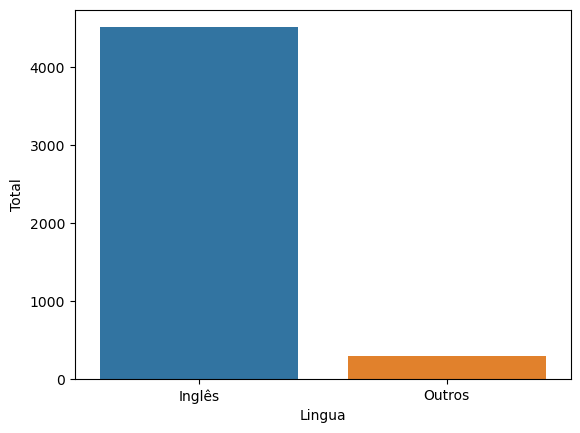

In [32]:
sns.barplot(x="Lingua", y="Total", data=dados)

([<matplotlib.patches.Wedge at 0x1b5e175c3d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Inglês'),
  Text(1.0791697511565306, -0.2130555049482467, 'Outros')])

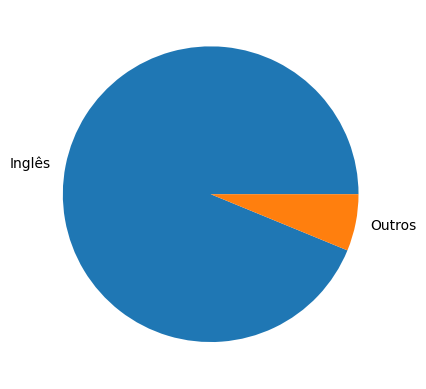

In [33]:
plt.pie(dados["Total"], labels = dados["Lingua"])

In [34]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

c:\Users\mstan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


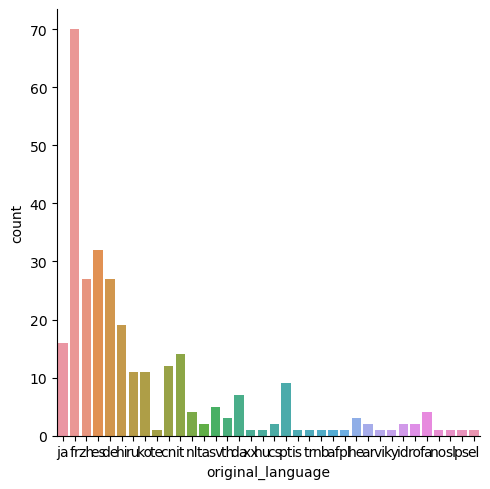

In [35]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_em_ingles)

c:\Users\mstan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


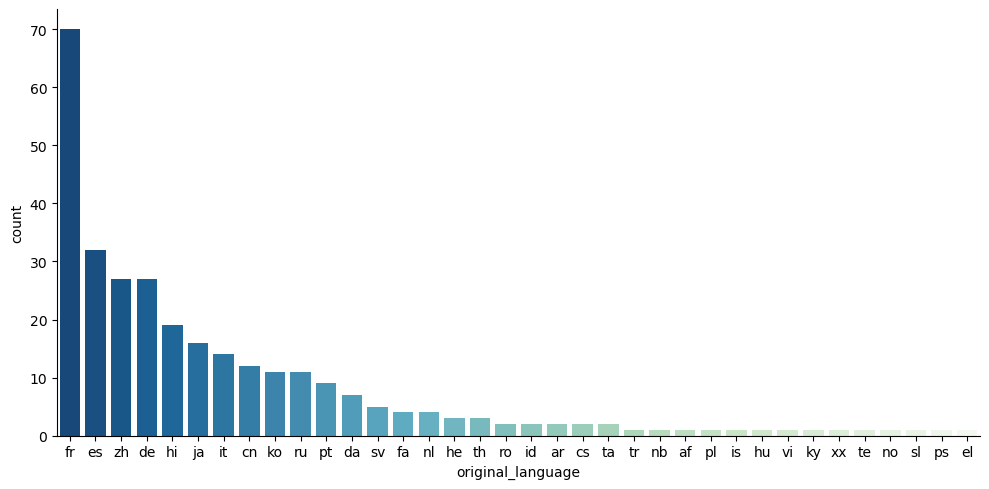

In [36]:
sns.catplot(x = "original_language", kind = "count",
        data = filmes_sem_lingua_original_em_ingles,
        aspect = 2,
        order = total_por_lingua_de_outros_filmes.index,
        palette="GnBu_r")

c:\Users\mstan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


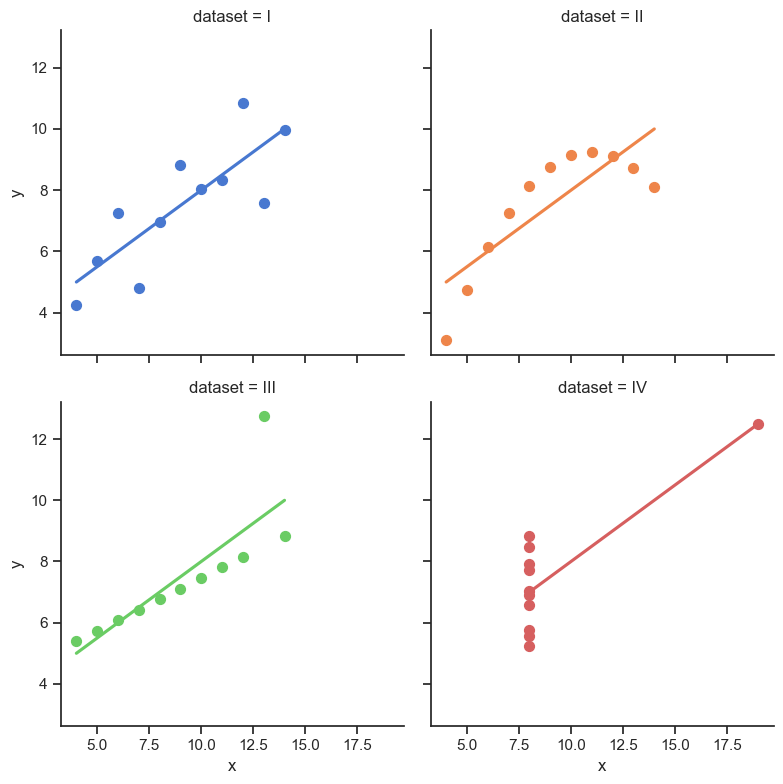

In [37]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Leitura e análise dos dois primeiros filmes do Movie Lens

In [38]:
import pandas as pd
filmes = pd.read_csv("movies.csv")
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [39]:
filmes.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [40]:
notas = pd.read_csv("ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [41]:
notas_ToyStory = notas.query("movieId ==1")
notas_Jumanji = notas.query("movieId == 2")
## Notas do Toy Story e do Jumanji  
print(len(notas_ToyStory), len(notas_Jumanji))

215 110


In [42]:
print("Nota média do Toy Story: %.2f" %notas_ToyStory.rating.mean())
print("Nota média do Jumanji: %.2f" %notas_Jumanji.rating.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43
